In [1]:
import numpy as np
from ito_diffusions import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
T = 1.0
SCHEME_STEPS = 250
H = 0.4

In [4]:
fBM = FBM(x0=100.0, T=T, scheme_steps=SCHEME_STEPS, drift=0.0, vol=1.0, H=H)

In [5]:
df = fBM.simulate()
x = np.array(df.index)
y = np.array(df['spot'])

/home/sauxpa/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


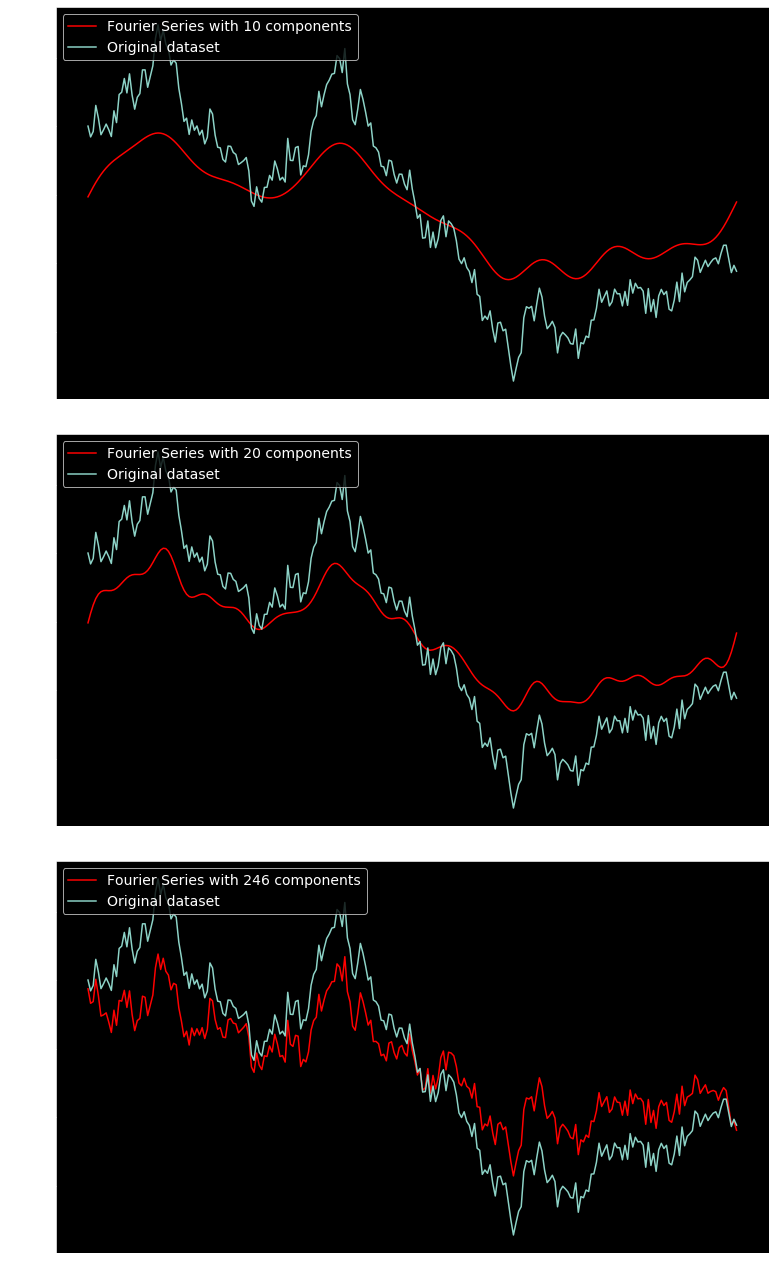

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1)

n = len(y)
components = [10, 20, n-5]

for c, ax in zip(components, axes):
    y_fft = np.fft.fft(y)
    np.put(y_fft, range(c+1, n), 0.0)
    y_ifft = np.fft.ifft(y_fft)
    ax.plot(x, y_ifft, color='r', label='Fourier Series with {} components'.format(c))
    ax.plot(x, y, label='Original dataset')
        
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()